<a href="https://colab.research.google.com/github/Dhruv-cs50/Machine-Learning-Projects-/blob/main/CS171_HW_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Complete the coding exercise below#

## Notes:##
1- Refer to [this reference](https://www.geeksforgeeks.org/k-nearest-neighbours/) for learning and inspiration.(You can borrow heavily from it).   
2- Comment generously but concisely the code.  
3- Grading: 50% code implementation, 20% code documentation (comments), 30% code is running correctly.  

###Load the packages you need below###

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
# import ...




### Use the data generated by the code snippet below###
**Please run this cell to generate data but do not change the code**

In [ ]:
# initialize seed
rng = np.random.RandomState(0)
# Create Training and testing data, 40 and 500 points respectively
X_train = np.sort(5 * rng.rand(40, 1), axis=0)
X_test = np.linspace(0, 5, 500)[:, np.newaxis]
y_train = np.sin(X_train).ravel()
# Add noise to targets
y_train[::5] += 1 * (0.5 - np.random.rand(8))
y_test = np.sin(X_test).ravel()

**1- Implement the function L2_distance(s1, s2) (Euclidian distance) where s1 and s2 are two data samples from the training set. The function returns a scalar**

In [ ]:
# Implemetation of L2_distance(ss, s2) function
def L2_distance(s1, s2):
    """
    Compute the L2 Euclidean distance between two numpy arrays.

    Parameters:
    s1 (np.array): First sample point.
    s2 (np.array): Second sample point.

    Returns:
    float: L2 distance between the two points.
    """
    return np.sqrt(np.sum((s1 - s2) ** 2))


**2- Implement the function knn_classifier_predict(training_data, training_labels, test_point, k) where k is the number of neighbors to consider. Again, please generously document your code.**

In [ ]:
# implementation of knn_classifier_predict(training_data, training_labels, test_point, k)
def knn_classifier_predict(training_data, training_labels, test_point, k):
    """
    Predict the class of a test point based on k-nearest neighbors.

    Parameters:
    training_data (np.array): The dataset containing training examples.
    training_labels (np.array): The labels corresponding to the training examples.
    test_point (np.array): The test point to classify.
    k (int): The number of nearest neighbors to consider.

    Returns:
    int: The predicted class for the test point.
    """
    # Calculate distances from the test point to all training points
    distances = np.array([L2_distance(test_point, train_point) for train_point in training_data])
    # Get the indices of the k smallest distances
    nearest_neighbors_indices = np.argsort(distances)[:k]
    # Get the labels of the k nearest neighbors
    nearest_labels = training_labels[nearest_neighbors_indices]
    # Return the most common label among the nearest neighbors
    return np.bincount(nearest_labels).argmax()

**3- Modify your code to make it a KNN-Regressor instead of classifier. knn_regressor_predict(training_data, training_labels, test_point, k) where k is the number of neighbors to consider. Again, please comment your code**

In [ ]:
# implementation of knn_regressor_predict(training_data, training_labels, test_point, k)
def knn_regressor_predict(training_data, training_labels, test_point, k):
    """
    Predict the output for a test point based on k-nearest neighbors regression.

    Parameters:
    training_data (np.array): The dataset containing training examples.
    training_labels (np.array): The labels corresponding to the training examples.
    test_point (np.array): The test point for which to predict the output.
    k (int): The number of nearest neighbors to consider.

    Returns:
    float: The predicted output for the test point.
    """
    # Calculate distances from the test point to all training points
    distances = np.array([L2_distance(test_point, train_point) for train_point in training_data])
    # Get the indices of the k smallest distances
    nearest_neighbors_indices = np.argsort(distances)[:k]
    # Get the labels of the k nearest neighbors
    nearest_labels = training_labels[nearest_neighbors_indices]
    # Return the average of the labels of the nearest neighbors
    return np.mean(nearest_labels)


**4- Now apply your knn_regressor_predict function with the datasets provided above: X_train, y_train, X_test. Call the prediction array y_pred**

In [ ]:
# Function for k-NN regression prediction
def knn_regressor_predict(training_data, training_labels, test_point, k):
    distances = np.array([L2_distance(test_point, train_point) for train_point in training_data])
    nearest_neighbors_indices = np.argsort(distances)[:k]
    nearest_labels = training_labels[nearest_neighbors_indices]
    return np.mean(nearest_labels)

# Provided data
rng = np.random.RandomState(0)
X_train = np.sort(5 * rng.rand(40, 1), axis=0)
X_test = np.linspace(0, 5, 500)[:, np.newaxis]
y_train = np.sin(X_train).ravel()
y_train[::5] += 1 * (0.5 - np.random.rand(8))  # Adding noise to targets
y_test = np.sin(X_test).ravel()


**5- Plot the results (Run the following code)**

This is a function to display the results. Run it with your results, but please do not change it.

In [ ]:
# Define the function to plot KNN results
def knn_plot_results(X_train, y_train, X_test, y_pred):
    # Ensure input arrays are numpy arrays for consistency
    X_train = np.asarray(X_train)
    y_train = np.asarray(y_train)
    X_test = np.asarray(X_test)
    y_pred = np.asarray(y_pred)

    # Check dimensions and presence of NaN/Inf values
    if X_train.ndim > 1:
        X_train = X_train.ravel()
    if X_test.ndim > 1:
        X_test = X_test.ravel()

    # Plotting
    plt.scatter(X_train, y_train, color="darkorange", label="data")
    plt.plot(X_test, y_pred, color="navy", label="prediction")
    plt.axis("tight")
    plt.legend()
    plt.title("KNeighborsRegressor")
    plt.tight_layout()
    plt.show()

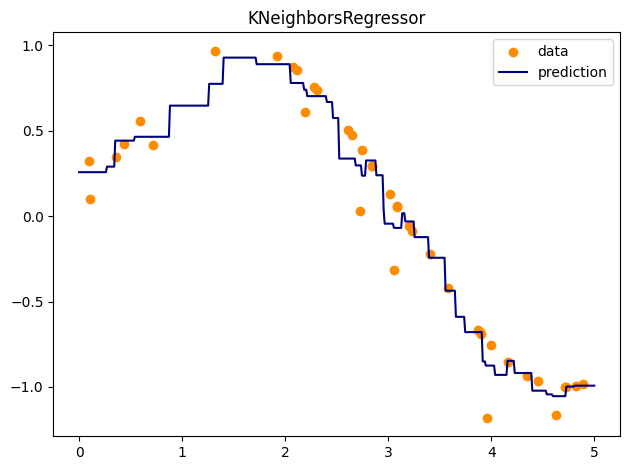

In [ ]:
k = 3

y_pred = [knn_regressor_predict(X_train, y_train, test_point, k) for test_point in X_test]


# plot the code
knn_plot_results(X_train, y_train, X_test, y_pred)

**6- What are your observations?**

Initially I had taken K as 5, but it was giving me more discrepancies, hence I decided to take k as 3, I played around with other values too, but 3 was the best. I tried 7, and 9 too.

Here are the observations:

Reducing k to 3 has made your k-NN model more sensitive to local variations in the data, resulting in a prediction line that closely follows the noise and minor fluctuations. This can be seen as overfitting, where the model captures noise as if it were significant trends, leading to less smooth predictions. While this might improve accuracy on this specific dataset, it may not generalize well to new, unseen data due to its high sensitivity to the training data's specific characteristics.

To find a balance between capturing important trends and avoiding overfitting, consider experimenting with different values of k and possibly using cross-validation to determine the best value. The goal is to ensure the model is neither too simple (underfitting) nor too complex (overfitting) for your actual application needs.
